In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'..\Data\owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [37]:
df[df['location']=='United States']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
403451,USA,North America,United States,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,24.6,NaN,2.77,78.86,0.93,338289856,-1914.9,-3.09,-3.09,-5.7
403452,USA,North America,United States,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
403453,USA,North America,United States,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
403454,USA,North America,United States,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
403455,USA,North America,United States,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405120,USA,North America,United States,2024-07-31,103436829.0,NaN,NaN,1192546.0,0.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
405121,USA,North America,United States,2024-08-01,103436829.0,NaN,NaN,1192546.0,0.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
405122,USA,North America,United States,2024-08-02,103436829.0,NaN,NaN,1192546.0,0.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
405123,USA,North America,United States,2024-08-03,103436829.0,NaN,NaN,1192546.0,0.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN


In [3]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [38]:
df_agg = df.groupby('location', as_index=False)['new_deaths'].sum()
df_agg.head()

,location,new_deaths
0,Afghanistan,7998.0
1,Africa,259121.0
2,Albania,3605.0
3,Algeria,6881.0
4,American Samoa,34.0


In [40]:
#check for missing data
df_agg['new_deaths'].info()
# no missing so carry on

<class 'pandas.core.series.Series'>
RangeIndex: 255 entries, 0 to 254
Series name: new_deaths
Non-Null Count  Dtype  
--------------  -----  
255 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [41]:
#basic summary of the data
df_agg.describe()
# from this summary, the maximum value seems like an error, let's check what country this is referring to

,new_deaths
count,2.550000e+02
mean,1.156983e+05
std,5.651786e+05
min,0.000000e+00
25%,1.605000e+02
50%,1.971000e+03
75%,1.840450e+04
max,7.060988e+06


In [43]:
#get the exact maximum value
df_agg['new_deaths'].max()

7060988.0

In [45]:
#search the df for the max value
df_agg[df_agg['new_deaths']== 7060988.0]

,location,new_deaths
251,World,7060988.0


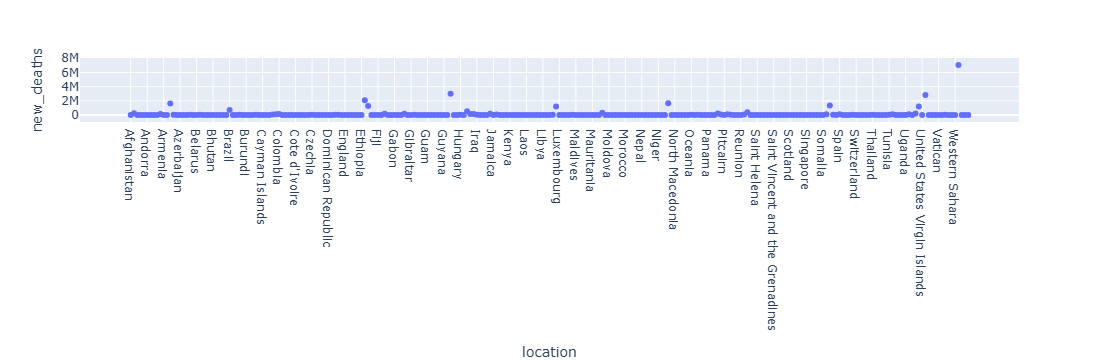

In [46]:
# The outlier is from the location being the world, not a specific country, so it must be the sum of all new cases.
# Therefore, we want to remove this value from our plot.
# however, first lets check for other outliers in a plot
import plotly.express as px
px.scatter(df_agg, x = 'location', y = 'new_deaths')
# The plot is very crammed due to the number of countries, however, its interactive so I can still identify which seem like outliers.
#It seems like most outliers are continents or summed countries based on income. SO lets remove these.


In [47]:
#remove outliers where applicable
outliers = ['Asia','Africa', 'Europe', 'European Union (27)', 'High-income countries','Upper-middle-income countries','Lower-middle-income countries', 'South America', 'World', 'North America']
df_agg.drop(df_agg[df_agg['location'].isin(outliers)].index, inplace = True)

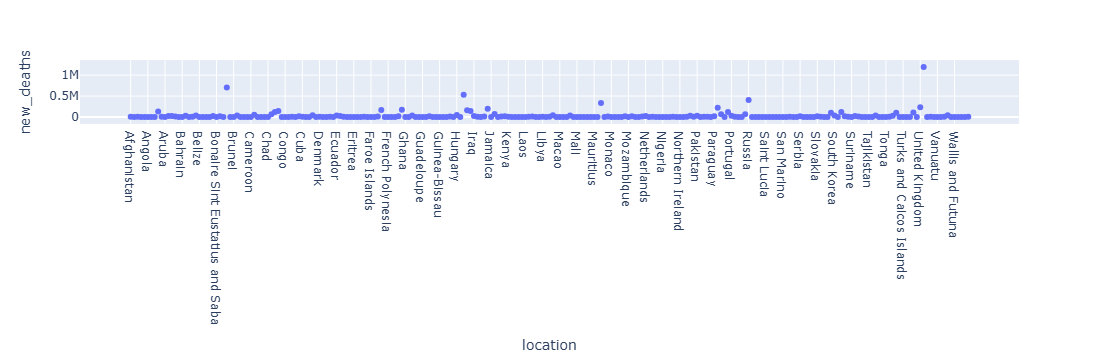

In [48]:
px.scatter(df_agg, x = 'location', y = 'new_deaths')
# From the scatter it seems that all error-based outliers are removed.
# United states seems very high however, this doesnt seem to be due to an error so will be kept

In [49]:
df_agg[df_agg['location']=='United States']

,location,new_deaths
239,United States,1193165.0


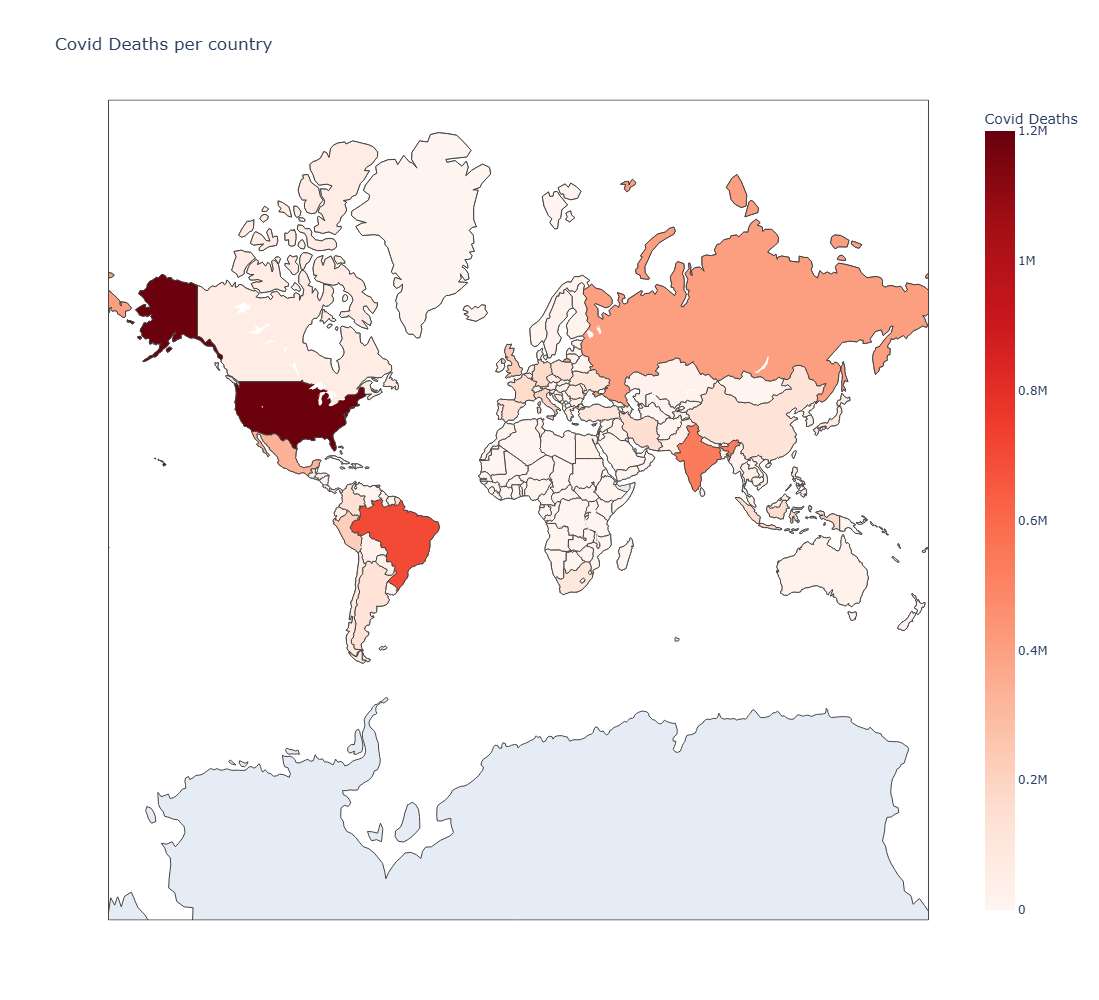

In [53]:
chorompa = go.Figure(data=go.Choropleth(
    locations=df_agg['location'],
    z=df_agg['new_deaths'],
    text=df_agg['location'],
    colorscale='Reds', 
    zmin=0,             
    zmax=1200000,
    colorbar_title='Covid Deaths',
    locationmode='country names'
))

chorompa.update_layout(
    title_text='Covid Deaths per country',
    geo=dict(showframe=True, projection_type='mercator'),
    width=1000,
    height=1000
)
# because the United States has such a high death count compared to other countries, its making them all seem similar in cases when they arent.
# To prevent this i will replot but change the maximum value for the highest count colour - alternatively i could do a plot without the us.

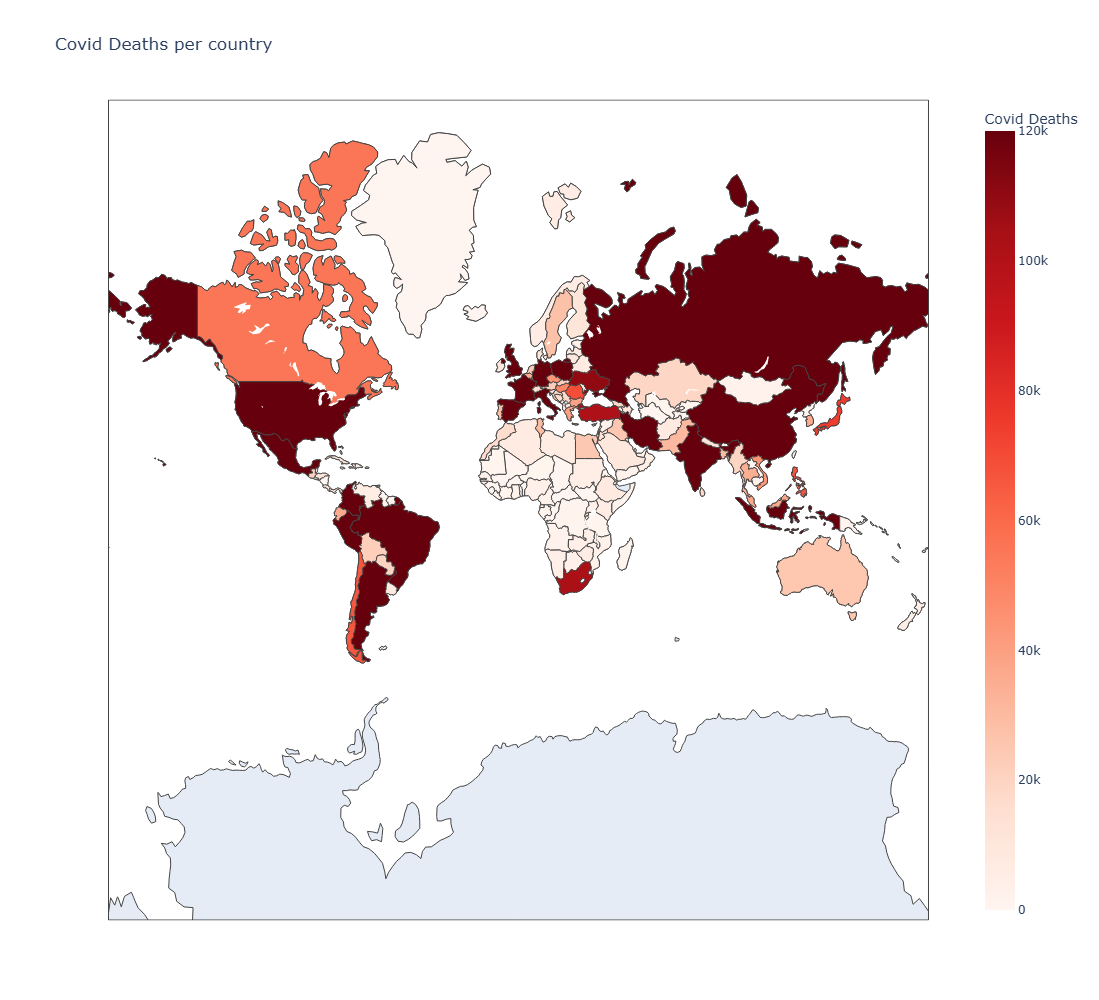

In [54]:
# changing the maximum value to have the highest count colour 
chorompa = go.Figure(data=go.Choropleth(
    locations=df_agg['location'],
    z=df_agg['new_deaths'],
    text=df_agg['location'],
    colorscale='Reds', 
    zmin=0,             
    zmax=120000,
    colorbar_title='Covid Deaths',
    locationmode='country names'
))

chorompa.update_layout(
    title_text='Covid Deaths per country',
    geo=dict(showframe=True, projection_type='mercator'),
    width=1000,
    height=1000
)

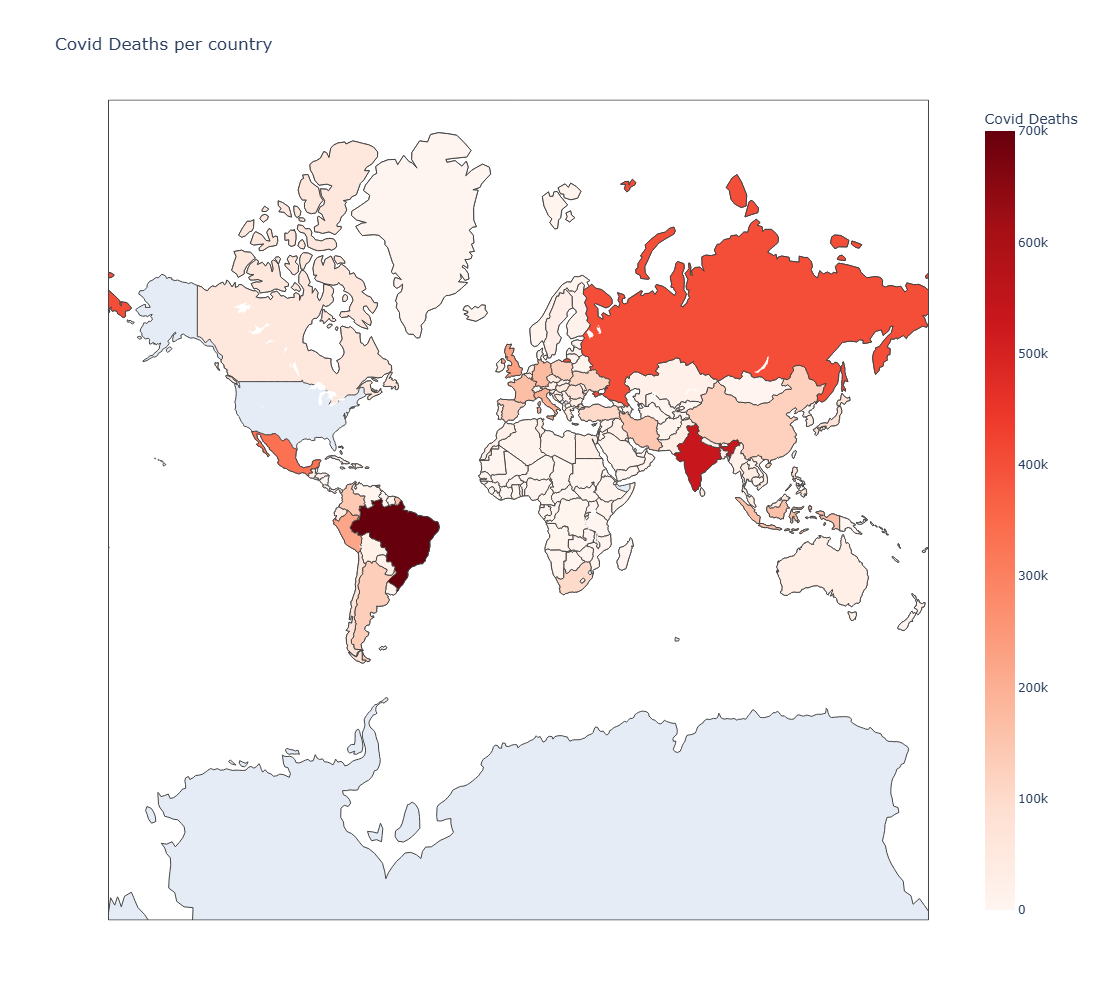

In [65]:
#plot without the us data
df_no_us = df_agg.drop(df_agg[df_agg['location']=='United States'].index)
chorompa = go.Figure(data=go.Choropleth(
    locations=df_no_us['location'],
    z=df_no_us['new_deaths'],
    text=df_no_us['location'],
    colorscale='Reds', 
    zmin=0,             
    zmax=700000,
    colorbar_title='Covid Deaths',
    locationmode='country names'
))

chorompa.update_layout(
    title_text='Covid Deaths per country',
    geo=dict(showframe=True, projection_type='mercator'),
    width=1000,
    height=1000
)
# this is better for seeing how other countries compare to each other now that the US isn't skewing the colour.

C:\Users\Reuben\AppData\Local\Temp\ipykernel_3592\2953356517.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,location,new_deaths
